In [2]:
# import fungsi get()
from requests import get
url = 'https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">




        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_


<h3>Import BeautifulSoup dari paket bs4 untuk melakukan parsing respon text menggunakan "html.parser"</h3>

In [3]:
#import beautifulsoup
from bs4 import BeautifulSoup

#parsing respon text
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

<h3>Mendapatkan semua tag container div menggunakan metode find_all()</h3>

In [4]:
# find_all() atribut dari class
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

# cetak type()
print(type(movie_containers))

#cetak jumlah()
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


<h3>Mengakses container pertama yang berisi informasi tentang film</h3>

In [5]:
# mengakses container di index pertama[0]
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted">
<span class="certificate">17+</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Drama, Sci-Fi            </span>

<h3>Mengakses konten pada tag div</h3>

In [6]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

<h3>Mengakses konten pada tag "a"</h3>

In [7]:
first_movie.a

<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a>

<h3>Mengakses konten di tag h3 (agar lebih dekat)</h3>

In [8]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

<h3>Setelah itu dpt mengakses tag "a" melalui notasi atribut tag "h3"</h3>

In [9]:
first_movie.h3.a

<a href="/title/tt3315342/">Logan</a>

<h3>Mengambil text str judul film</h3>

In [10]:
first_name = first_movie.h3.a.text
first_name

'Logan'

In [11]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [12]:
first_year = first_year.text
first_year

'(2017)'

In [13]:
first_movie.strong

<strong>8.1</strong>

<h3>Mengakses elemen tag "strong" dan mengubah menjadi type float</h3>

In [14]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

<h3>Menyalin & menempelkan nilai tersebut dari tab metascore dan favourable</h3>

In [15]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


<h3>Mengambil data vote melalui parameter attrs</h3>

In [16]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="691712" name="nv">691,712</span>

In [17]:
# menampilkan data value
first_votes['data-value']

'691712'

<h3>Mengubah nilai tersebut menjadi bilangan bulat</h3>

In [18]:
first_votes = int(first_votes['data-value'])

<h3>Menggunakan find() untuk mencari setiap film dan Ketika find() tidak menemukan apa pun, akan mengembalikan objek None.</h3

In [22]:
eighth_movie_mscore = movie_containers[16].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)

bs4.element.Tag

In [28]:
# Daftar untuk menyimpan data names, years, imdb, metacores, votes
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Ekstrak data dari data film
for container in movie_containers:
    
# Jika film memiliki Metascore, maka ekstrak:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        # name
        name = container.h3.a.text
        names.append(name)
        # year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        # IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        # metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        # votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

<h3>Import pandas untuk memudahkan melihat apakah telah berhasil mengambil data</h3>

In [29]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      42 non-null     object 
 1   year       42 non-null     object 
 2   imdb       42 non-null     float64
 3   metascore  42 non-null     int64  
 4   votes      42 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,691712
1,Thor: Ragnarok,(2017),7.9,74,650942
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,613860
3,Wonder Woman,(2017),7.4,76,613321
4,Dunkirk,(2017),7.8,94,598930
5,Star Wars: Episode VIII - The Last Jedi,(2017),6.9,84,590784
6,Spider-Man: Homecoming,(2017),7.4,73,558588
7,Get Out,(I) (2017),7.7,85,533659
8,Blade Runner 2049,(2017),8.0,81,503357
9,It,(I) (2017),7.3,69,492155


<h3>Mengomunikasikan sesuatu bahasa kepada server</h3>

In [30]:
# Parameter q menunjukkan sejauh mana kita lebih menyukai bahasa tertentu.
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [31]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

In [39]:
from time import sleep
from random import randint

In [53]:
from time import time;start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.9999430212063627 requests/s
Request: 2; Frequency: 0.9999427828150093 requests/s
Request: 3; Frequency: 0.5999656982959625 requests/s
Request: 4; Frequency: 0.4999714063069611 requests/s
Request: 5; Frequency: 0.5555237829460732 requests/s


In [58]:
from IPython.core.display import clear_output
start_time = time();
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

Request: 1; Frequency: 0.9999425444237694 requests/s
Request: 2; Frequency: 0.49997139140750463 requests/s
Request: 3; Frequency: 0.49997139140750463 requests/s
Request: 4; Frequency: 0.49997139140750463 requests/s
Request: 5; Frequency: 0.49997139140750463 requests/s


<h3>Menggunakan modul warnings() untuk memberikan peringatan jika kode status bukan 200</h3>

In [73]:
import warnings 
warnings.filterwarnings(action='ignore')

<h3>Membuat 72 permintaan</h3>

In [72]:
# Mendeklarasikan ulang daftar untuk menyimpan data
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Mempersiapkan pemantauan loop
start_time = time()
requests = 0

# Untuk setiap halaman dalam interval 1-4
for year_url in years_url:
    for page in pages:

        # Buat permintaan Request
        response = get('https://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Jeda loop
        sleep(randint(8,15))

        # Monitor requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Berikan peringatan untuk kode status non-200
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Putuskan loop jika jumlah permintaan lebih besar
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parsing konten permintaan dengan BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Pilih semua 50 film dari satu halaman
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
        for container in mv_containers:
            # Jika film memiliki Metascore, maka:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape name
                name = container.h3.a.text
                names.append(name)

                # Scrape year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape IMDB
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.06885967142894317 requests/s


<h3>Memeriksa data yang tergores</h3>

In [74]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      3244 non-null   object 
 1   year       3244 non-null   object 
 2   imdb       3244 non-null   float64
 3   metascore  3244 non-null   int64  
 4   votes      3244 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 126.8+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1404318
1,Memento,(2000),8.4,80,1172796
2,Snatch,(2000),8.3,55,814148
3,Requiem for a Dream,(2000),8.3,68,798012
4,X-Men,(2000),7.4,64,589381
5,Cast Away,(2000),7.8,73,554199
6,American Psycho,(2000),7.6,64,528674
7,Unbreakable,(2000),7.3,62,401980
8,Mission: Impossible II,(2000),6.1,59,326358
9,Meet the Parents,(2000),7.0,73,321401


<h3>Membersihkan data yang tergores</h3

In [75]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1404318
1,Memento,(2000),8.4,80,1172796
2,Snatch,(2000),8.3,55,814148
3,Requiem for a Dream,(2000),8.3,68,798012
4,X-Men,(2000),7.4,64,589381


<h3>Memeriksa nilai unik dari kolom tahun</h3>

In [76]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(IX) (2016)', '(I) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

In [77]:
# mengonversi hasilnya menjadi bilangan bulat menggunakan metode astype():
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [78]:
# melihat jenis nilai
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int32

<h3>Memeriksa nilai minimum dan maksimum dari setiap jenis peringkat</h3>

In [79]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [80]:
# mengalikan peringkat IMDB dengan 10 kemudian melakukan pemeriksaan dg melihat 3 baris pertama
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1404318,85.0
1,Memento,2000,8.4,80,1172796,84.0
2,Snatch,2000,8.3,55,814148,83.0


In [81]:
# export csv file
movie_ratings.to_csv('movie_ratings.csv')

<h3>Visualisasi data</h3>

No handles with labels found to put in legend.


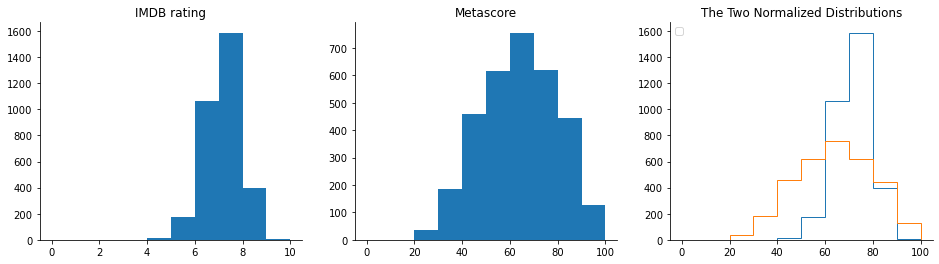

In [84]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()